<a href="https://colab.research.google.com/github/derting/ColabNote/blob/master/Keras_Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

'2.2.0-rc3'

In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [46]:
X_train = X_train / 255.0
X_train.shape #50000 row, 32x32, 3維

(50000, 32, 32, 3)

In [47]:
X_test = X_test / 255.0
X_test.shape #50000 row, 32x32, 3維

(10000, 32, 32, 3)

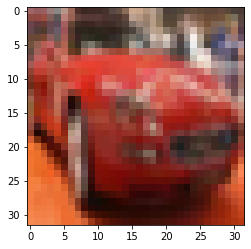

In [48]:
plt.imshow(X_train[5])

Convolutional Neural Network

In [118]:
model = tf.keras.models.Sequential()
#第一層
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3])) #Conv2D作為第一層需要提供input_shape參數

#第二層
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

#第三層
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

#第四層
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))


#第三層
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"))

#第四層
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))


model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))


# model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"))
# model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"))
# model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

#第五層
model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(units=128, activation='relu'))

# model.add(tf.keras.layers.Dropout(0.2))

#輸出層
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_150 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_151 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_152 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_153 (Conv2D)          (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_154 (Conv2D)          (None, 8, 8, 128)       

In [119]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])
model.fit(X_train, y_train, epochs=15)

Epoch 1/15
1563/1563 [==============================] - 24s 15ms/step - loss: 2.3028 - sparse_categorical_accuracy: 0.0972
Epoch 2/15
1563/1563 [==============================] - 24s 15ms/step - loss: 2.3028 - sparse_categorical_accuracy: 0.0964
Epoch 3/15
1563/1563 [==============================] - 24s 15ms/step - loss: 2.3028 - sparse_categorical_accuracy: 0.0989
Epoch 4/15
1563/1563 [==============================] - 24s 15ms/step - loss: 2.3028 - sparse_categorical_accuracy: 0.0971
Epoch 5/15
1563/1563 [==============================] - 24s 15ms/step - loss: 2.3028 - sparse_categorical_accuracy: 0.0965
Epoch 6/15
1563/1563 [==============================] - 24s 15ms/step - loss: 2.3028 - sparse_categorical_accuracy: 0.0949
Epoch 7/15
1563/1563 [==============================] - 24s 15ms/step - loss: 2.3028 - sparse_categorical_accuracy: 0.0990
Epoch 8/15
1563/1563 [==============================] - 24s 15ms/step - loss: 2.3027 - sparse_categorical_accuracy: 0.0978
Epoch 9/15
1563/

In [120]:
#X_train, y_train, X_test, y_test
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy: {}".format(test_accuracy))

313/313 [==============================] - 2s 5ms/step - loss: 2.3026 - sparse_categorical_accuracy: 0.1000
Test accuracy: 0.10000000149011612
